# Homework 6
## Problem 3
|Temp $\degree C$|$x_A$|$y_A$|
|----|----|--|
|78.4|0.00|0.00|
|77.5|0.015|0.075|
|75|0.05|0.28|
|72.5|0.12|0.42|
|70|0.22|0.54|
|68.5|0.31|0.60|
|67.7|0.68|0.68|
|68.5|0.81|0.73|
|72.5|0.91|0.82|
|75|0.95|0.88|
|77.5|0.98|0.95|
|80.1|1.00|1.00|

## problem 3.a and 3.b
Determine the bubble point temperature and composition of the first bubble when $z_A=0.25$.
</br></br>
The bubble point temperature is the temperature when $x_A=0.25$ and the composition of the first bubble is $y_A$ at the bubble point temperature. The following code, similar to problems 1 and 2, interpolates through the data and finds the bubble point temperature and composition of the first bubble.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

T_bub = 69.5 
y_bub = 0.56
T_dew = 75.36585365853658 
x_dew = 0.044878048780487886


''

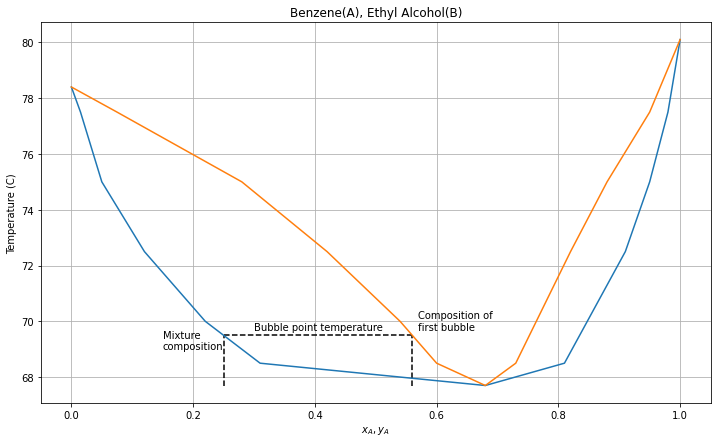

In [2]:
T = np.array([78.4,77.5,75,72.5,70,68.5,67.7,68.5,72.5,75,77.5,80.1])               #data
xA = np.array([0,.015,.05,.12,.22,.31,.68,.81,.91,.95,.98,1])
yA = np.array([0,.075,.28,.42,.54,.6,.68,.73,.82,.88,.95,1])

molFrac = np.linspace(0,.6,9999)                                                    #interpolate through zA=[0,.6]
interpX = interp1d(xA[:7],T[:7])                                                    #T f(x)
interpY = interp1d(yA[:7],T[:7])                                                    #T f(y)
interpTx = interp1d(T[:7],xA[:7])                                                   #x f(T)
interpTy = interp1d(T[:7],yA[:7])                                                   #y f(T)
# print(interpX(molFrac))


zA = .25                                                                            #mixture composition

Tbub = interpX(zA)                                                                  #bubble point temp      
ybub = interpTy(Tbub)                                                               #composition of first bubb
Tdew = interpY(zA)
xdew = interpTx(Tdew)

plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(zA,min(T),interpX(zA),linestyles='--',color='k')
plt.hlines(Tbub,zA,ybub,linestyles='--',color='k')
plt.vlines(ybub,min(T),Tbub,linestyles='--',colors='k')

plt.text(.15,69,'Mixture\ncomposition')
plt.text(.3,69.7,'Bubble point temperature')
plt.text(.57,69.7,'Composition of\nfirst bubble')

plt.title('Benzene(A), Ethyl Alcohol(B)')
plt.ylabel('Temperature (C)')
plt.xlabel(r'$x_A,y_A$')
plt.grid()
print('T_bub =',Tbub,'\ny_bub =',ybub)
print('T_dew =',Tdew,'\nx_dew =',xdew)
;

The bubble point temperature is about $69.5 \degree C$ and the composition of the first bubble is about $56$% Benzene.

## Problem 3.c
Determine mixture composition when $25$% has evaporated.
</br></br>
This problem can be solved using the inverse lever arm rule which for this problem becomes
$$
0.25 = \frac{0.25-a}{c-a}
$$
where $a$ and $c$ are displayed on the plot below. $a$ and $c$ are found by solving the above equation on $y_A= [0.25,0.56]$ which is done in the code below.

''

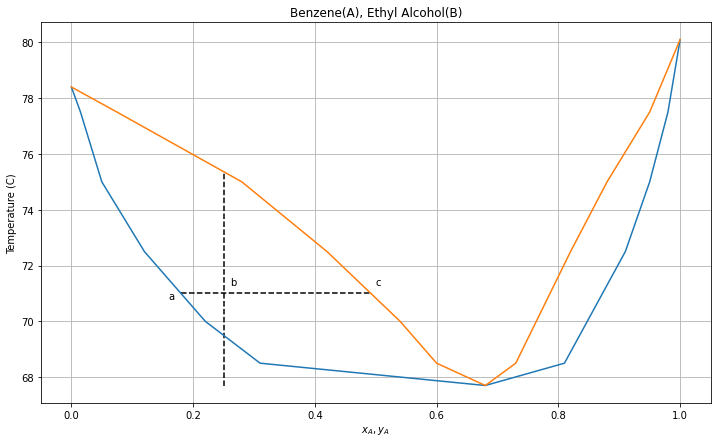

In [3]:
plt.figure(figsize=(12,7))

plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(zA,min(T),interpY(zA),linestyles='--',color='k')
plt.hlines(71,interpTx(71),interpTy(71),linestyles='--',color='k')

plt.text(.16,70.8,'a')
plt.text(.26,71.3,'b')
plt.text(.5,71.3,'c')

plt.title('Benzene(A), Ethyl Alcohol(B)')
plt.ylabel('Temperature (C)')
plt.xlabel(r'$x_A,y_A$')
plt.grid()

;

In [4]:
possibY = []                                                #loop to make array of possible y values
for i in range(len(molFrac)):
    if molFrac[i] < ybub and molFrac[i] > zA:
        possibY.append(molFrac[i])
possibY = np.array(possibY)
possibX = interpTx(interpY(possibY))                        #possible x values

sol = (zA-possibX)/(possibY-possibX)                       #solution to eq1
sol = sol.tolist()


In [5]:
for i in sol:                                               #loop to find x,y to achieve answer of 0.25
    if .25/i >=.9999 and .25/i <=1:
        percVap1 = i
        print(possibX[sol.index(i)],possibY[sol.index(i)],i)
print(interpY(possibY[sol.index(percVap1)]))   

0.17238047609521914 0.4828565713142628 0.2500016107520922
71.19048809761952


The composition of the liquid when $25$% of the mixture has evaporated is about $17.2$% benzene 

## Problem 3.d
Determine composition of the liquid phase when $90$% has evaporated.
</br></br>
The process to solving this problem is identical to solving problem 3.c but the inverse lever arm rule is
$$
0.90 = \frac{0.25-a}{c-a}
$$

''

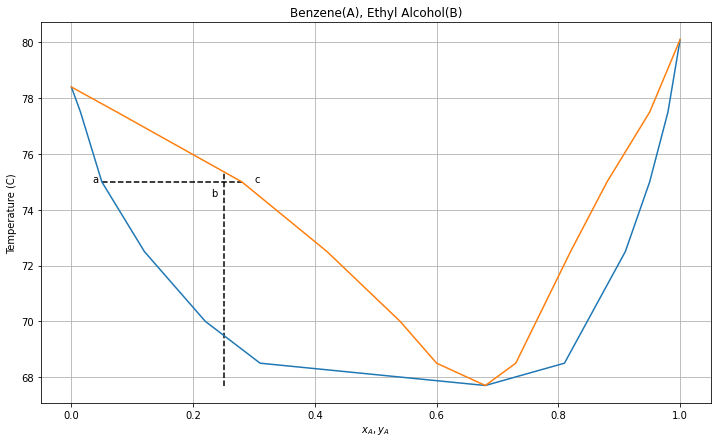

In [6]:
plt.figure(figsize=(12,7))

plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(zA,min(T),interpY(zA),linestyles='--',color='k')
plt.hlines(75,interpTx(75),interpTy(75),linestyles='--',color='k')

plt.text(.035,75,'a')
plt.text(.23,74.5,'b')
plt.text(.3,75,'c')

plt.title('Benzene(A), Ethyl Alcohol(B)')
plt.ylabel('Temperature (C)')
plt.xlabel(r'$x_A,y_A$')
plt.grid()

;

In [7]:
for i in sol:                                               #loop to find x,y to achieve answer of 0.25
    if .9/i >=.9998 and .9/i <=1:
        percVap2 = i
        print(possibX[sol.index(i)],possibY[sol.index(i)],i)
print(interpY(possibY[sol.index(percVap2)]))   

0.04869125044521096 0.27233446689337865 0.9001334927654514
75.09348211105636


When $90$% of the mixture vaporizes, the liquid phase is about $4.9$% benzene

## Problem 3.e
Determine composition of the liquid when $25$% of the mixture has vaporized and been removed and then $35$% of the remaining mixture is vaporized.
</br></br>
There are two steps to this problem. The first step is to determine the composition of the liquid phase when $25$% has been vaporized. This was found in problem 3.c to be about $17.2$% benzene. For the second step, all the vapor has been removed so the mole fraction of benzene in the mixture after the vapor has been removed is the same as the mole fraction of benzene in the residual liquid phase. $\therefore$ the inverse lever arm rule becomes
$$
0.35 = \frac{0.172-a}{c-a}

$$

''

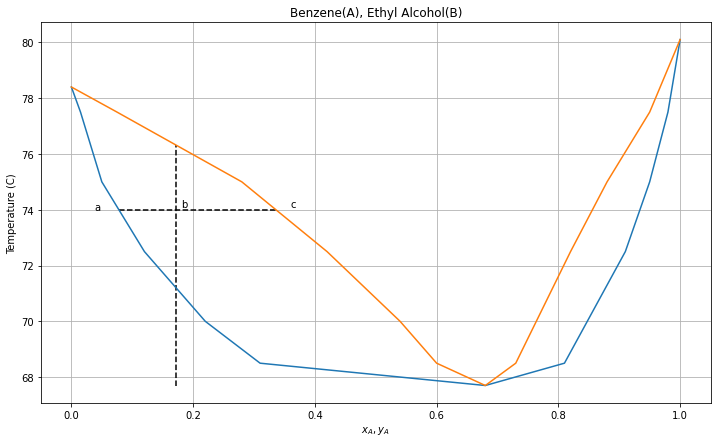

In [11]:
zAnew = possibX[sol.index(percVap1)]

plt.figure(figsize=(12,7))

plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(zAnew,min(T),interpY(zAnew),linestyles='--',color='k')
plt.hlines(74,interpTx(74),interpTy(74),linestyles='--',color='k')

plt.text(.038,74,'a')
plt.text(.18,74.1,'b')
plt.text(.36,74.1,'c')

plt.title('Benzene(A), Ethyl Alcohol(B)')
plt.ylabel('Temperature (C)')
plt.xlabel(r'$x_A,y_A$')
plt.grid()

;

In [9]:
TbubNew = interpX(zAnew)
ybubNew = interpTy(TbubNew)
possibY2 = []                                                #loop to make array of possible y values
for i in range(len(molFrac)):
    if molFrac[i] < ybubNew and molFrac[i] > zAnew:
        possibY2.append(molFrac[i])
possibY2 = np.array(possibY2)
possibX2 = interpTx(interpY(possibY2))                        #possible x values


In [12]:
sol2 = (zAnew-possibX2)/(possibY2-possibX2)                       #solution to eq1
sol2 = sol2.tolist()

for i in sol2:                                               #loop to find x,y to achieve answer of 0.25
    if i!=0 and .35/i >=.9997 and .35/i <=1:
        percVap3 = i
        print(possibX2[sol2.index(i)],possibY2[sol2.index(i)],i)
print(interpY(possibY2[sol2.index(percVap3)]))  

0.08100420084016804 0.342008401680336 0.3500950366350904
73.89270711285114


The composition of the remaining fluid at the end of the process is about $8.1$% benzene